# ADCP Data Processing for C-Streams Cruises June and July 2024 

The data used in this repository is the os75nb for both cruises. It was post processed after the cruises were completed. 


In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import glob
import cmocean.cm as cmo
import cartopy.crs as ccrs
import matplotlib as mpl
import cartopy.feature as cfeature
import geopandas as gpd
import warnings
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
warnings.filterwarnings("ignore")

font = {'family' : 'Avenir',
        'weight' : 'normal',
        'size'   : 20}
mpl.rc('font', **font)

In [2]:
def rot_ticks(axs,rot,ha):
    for xlabels in axs.get_xticklabels():
                xlabels.set_rotation(rot)
                xlabels.set_ha(ha)

In [3]:
def add_features(ax):
    
    ax.add_feature(cfeature.LAND,   facecolor='0.8',edgecolor='k',zorder=3)
    ax.add_feature(cfeature.RIVERS, edgecolor='w'  ,zorder=3)
    ax.add_feature(cfeature.LAKES,  facecolor='w'  ,zorder=3)
    ax.set(xlabel='',ylabel='')
    
    gls = ax.gridlines(crs=ccrs.PlateCarree(), 
                        draw_labels=True,
                        x_inline=False, 
                        y_inline=False,
                        linewidth=0.75,
                        alpha=0.75, 
                        linestyle='--',
                        lw=0,
                        color='k',
                        ylocs=mpl.ticker.MultipleLocator(base=2),
                        xlocs=mpl.ticker.MultipleLocator(base=2))

    gls.top_labels = False
    gls.bottom_labels = True
    gls.right_labels = False    
    gls.left_labels = True
    gls.xpadding=10
    gls.ypadding=10
    for k, spine in ax.spines.items():  #ax.spines is a dictionary
        spine.set_zorder(10)

In [4]:
bathy = xr.open_dataset('gebco_2023_n27.5_s25.0_w-80.5_e-78.5.nc')
bathy = bathy.interp(lon=np.arange(-80.5,-78.5,.05),lat=np.arange(25,27.5,.05))

The plots below are using the data from the first leg of the cruises 

In [5]:
ds = xr.open_dataset("ws24172os75nb.nc")

In [6]:
#can only run this once
ds['depth'] = ds['depth'].isel(time=0)
ds = ds.swap_dims({"depth_cell":"depth"})

Text(0.5, 0.98, 'C-Streams Ship ADCP Data')

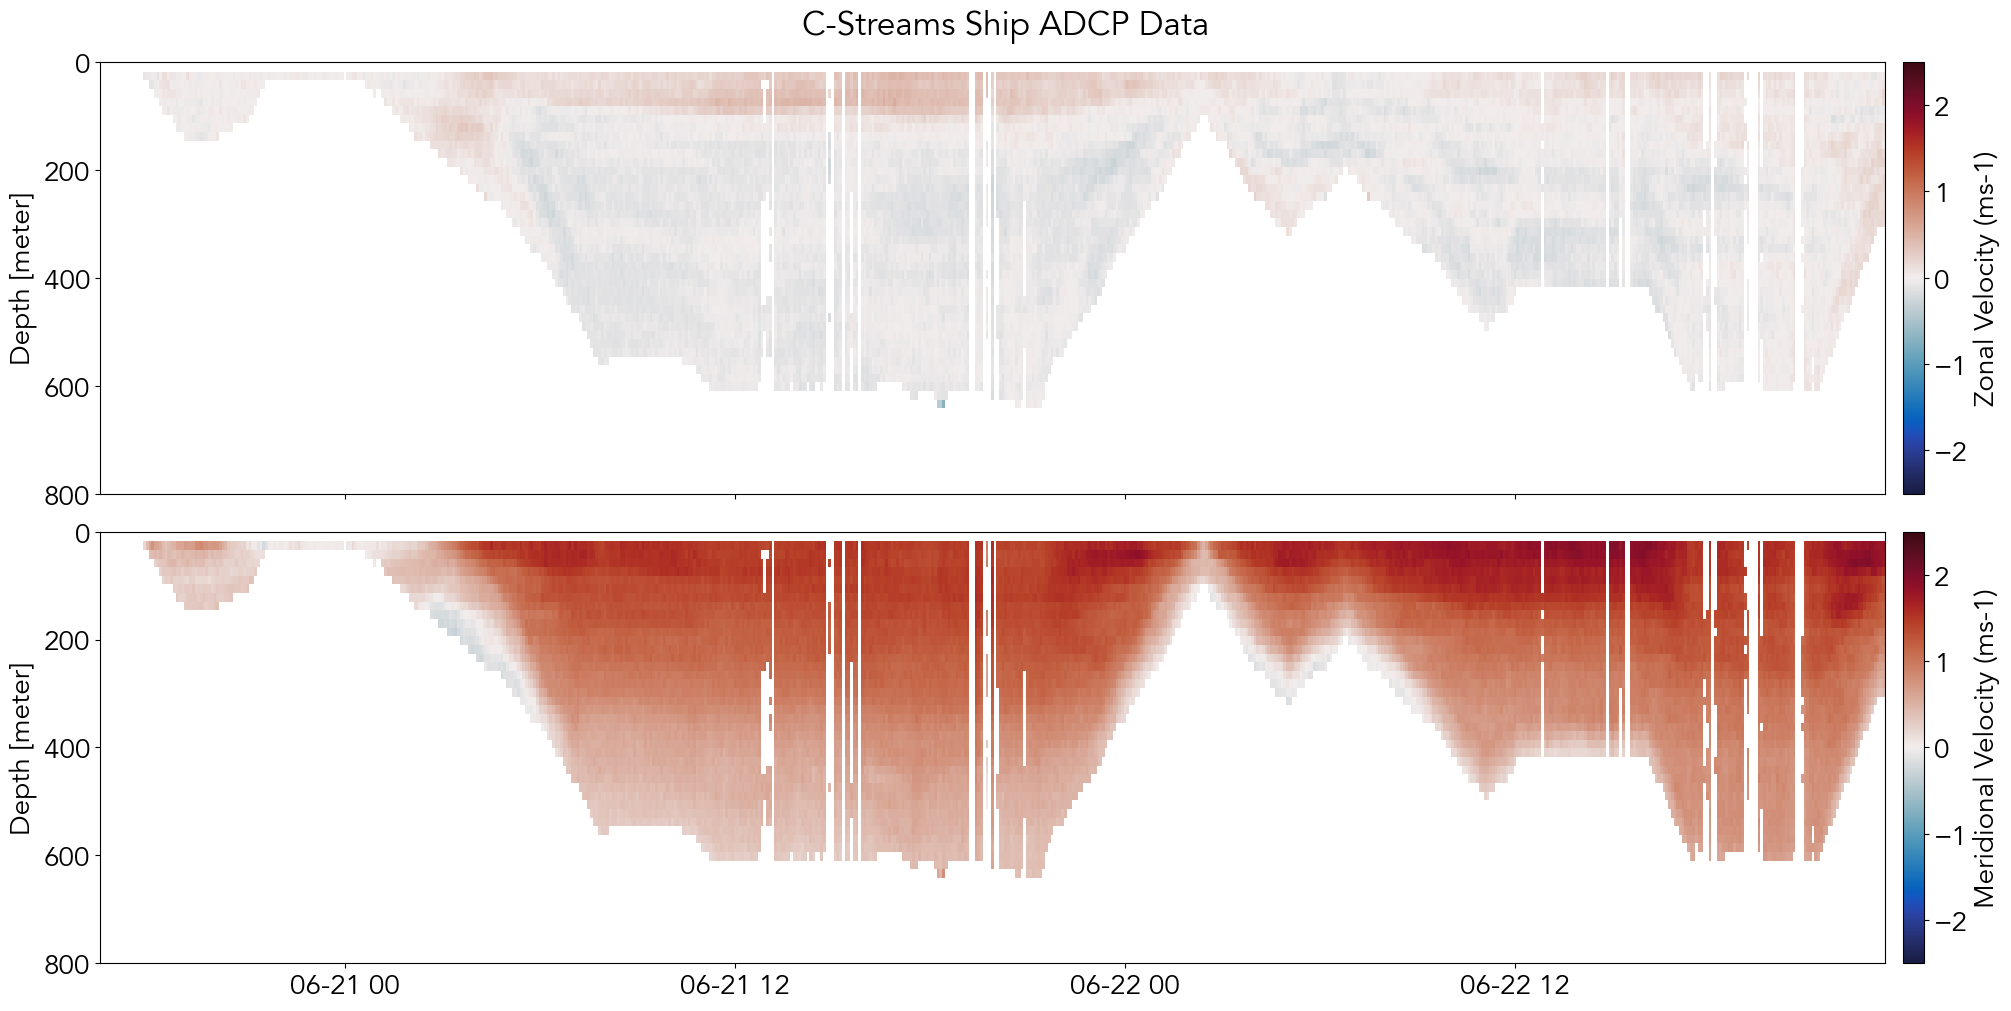

In [7]:
fig, (ax, bx) = plt.subplots(2, 1, figsize=(20,10), sharex= True, constrained_layout = True)

var = ['u', 'v']
labels = ["Zonal Velocity (ms-1)", "Meridional Velocity (ms-1)"]

for i, vari in enumerate(var):
    ds[vari].plot(y="depth", ylim=(800,0), vmin=-2.5, vmax=2.5, 
                  ax=[ax, bx][i],
                  cmap="cmo.balance",
                  cbar_kwargs={'pad':0.01,'label':labels[i]})
    
#ds["amp"].plot(y="depth", ylim=(1000,0), cmap="cmo.dense", ax=cx)

bx.xaxis.set_major_locator(mdates.HourLocator(np.arange(0,24,12)))
bx.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d %H"))
rot_ticks(bx, 0, 'center')

ax.set(xlabel=None)
bx.set(xlabel=None)
#cx.set(xlabel=None)

fig.suptitle("C-Streams Ship ADCP Data")

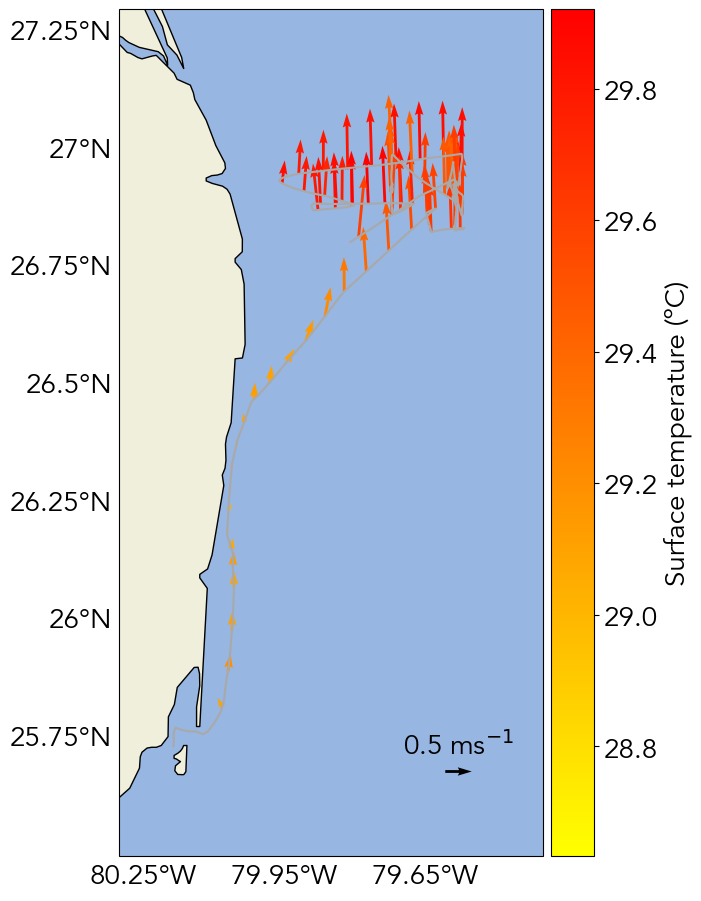

In [8]:
fig, ax = plt.subplots(figsize=(11,11), subplot_kw={"projection":ccrs.PlateCarree()})
ax.plot(ds.lon, ds.lat, c="darkgrey")
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)
gl = ax.gridlines(lw =0, 
                  draw_labels=True)
gl.top_labels = False
gl.right_labels = False
quivplt = ds.isel(time=np.arange(0,len(ds.time),8),
                  depth=slice(0,100)).mean('depth').plot.quiver(x='lon',
                                                                y='lat',
                                                                u='u',
                                                                v='v',
                                                                scale=8,
                                                                pivot='tail',
                                                                hue="tr_temp",
                                                                cmap="autumn_r",
                                                                cbar_kwargs={'pad':0.01,'label':'Surface temperature (ºC)'})

qk = ax.quiverkey(quivplt, 0.8, 0.1, 0.5, '0.5 ms$^{-1}$', 
                  labelpos='N',
                  coordinates='axes', zorder=6, color='k')
ax.set_extent([-80.3,-79.4,27.3,25.5])
#plt.title("Cruise Track with ADCP Data")

The plots below are using the data from the second leg of cruises. 

In [9]:
ds = xr.open_dataset("ws24181os75nb.nc")

In [10]:
#can only run this once
ds['depth'] = ds['depth'].isel(time=0)
ds = ds.swap_dims({"depth_cell":"depth"})

Text(0.5, 0.98, 'C-Streams Shipboard ADCP')

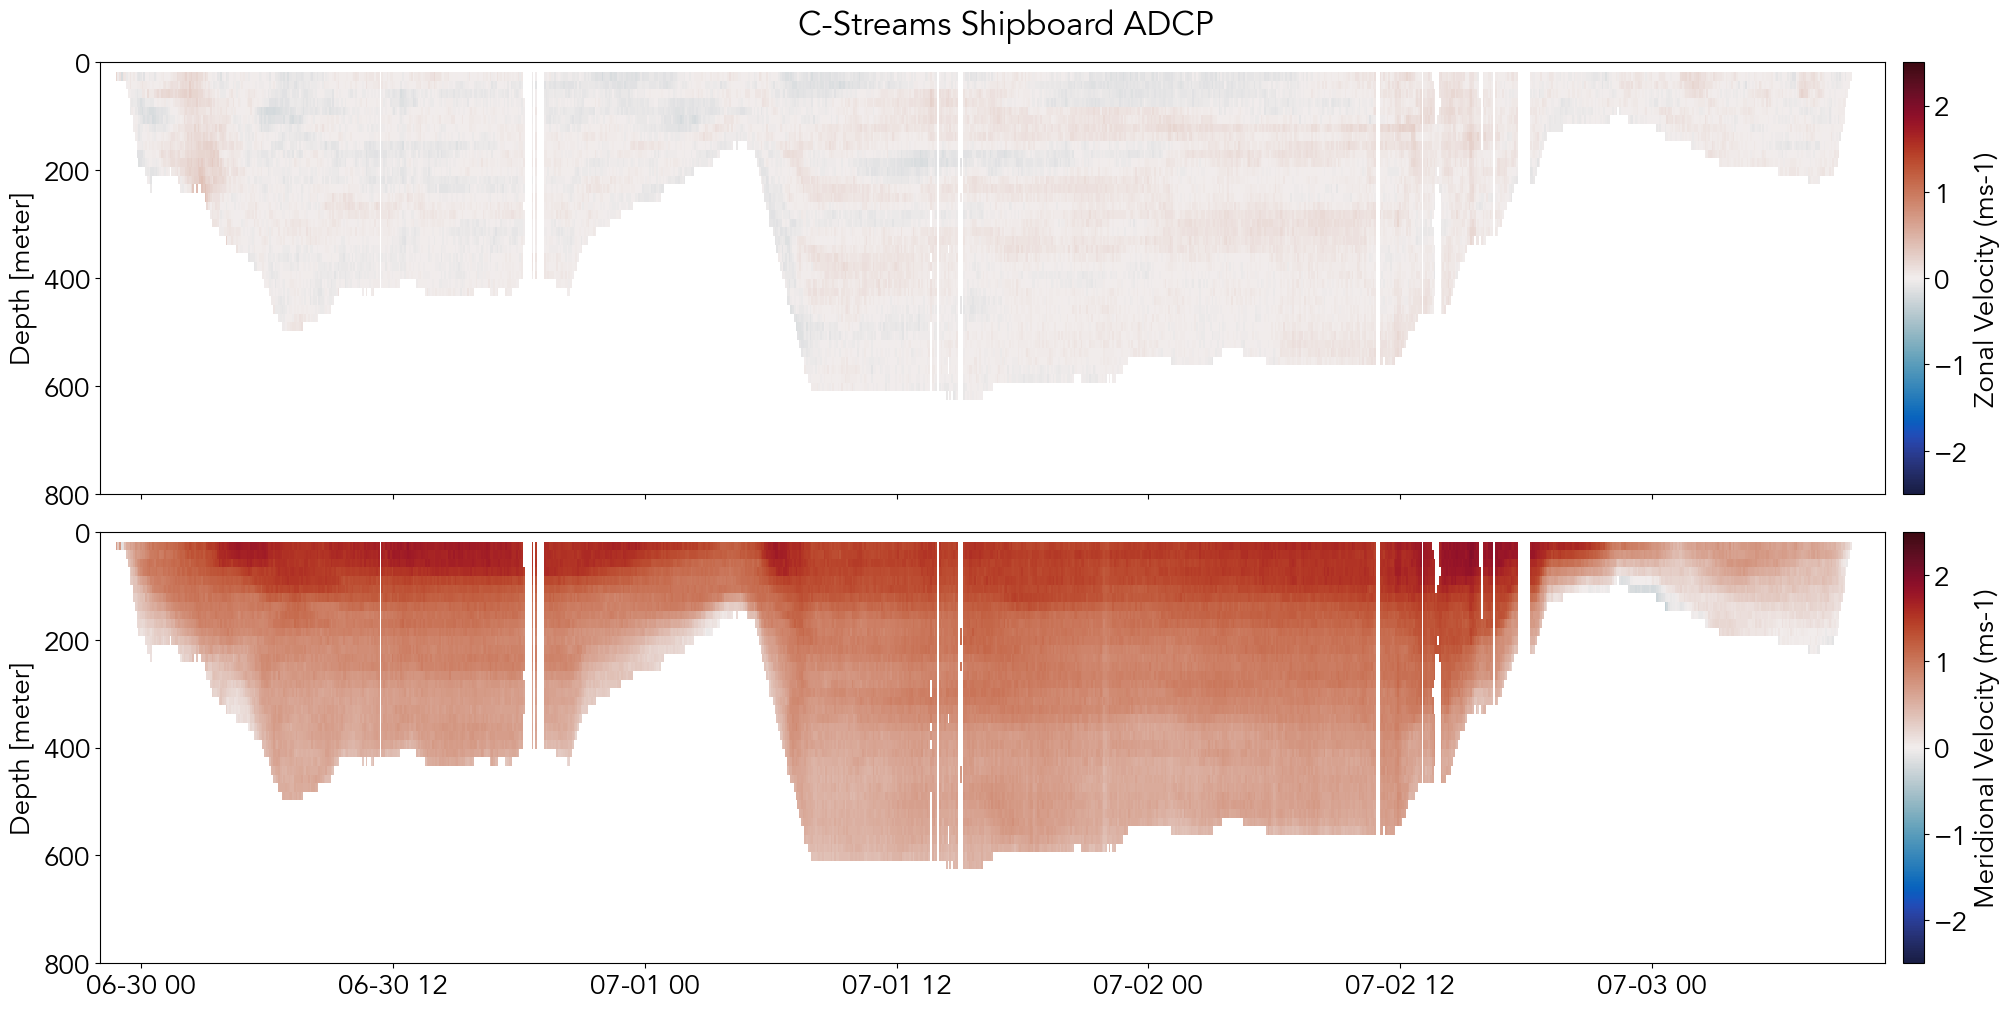

In [11]:
fig, (ax, bx) = plt.subplots(2, 1, figsize=(20,10), sharex= True, constrained_layout = True)

var = ['u', 'v']
labels = ["Zonal Velocity (ms-1)", "Meridional Velocity (ms-1)"]

for i, vari in enumerate(var):
    ds[vari].plot(y="depth", ylim=(800,0), vmin=-2.5, vmax=2.5, 
                  ax=[ax, bx][i],
                  cmap="cmo.balance",
                  cbar_kwargs={'pad':0.01,'label':labels[i]})
    
#ds["amp"].plot(y="depth", ylim=(1000,0), cmap="cmo.dense", ax=cx)

bx.xaxis.set_major_locator(mdates.HourLocator(np.arange(0,24,12)))
bx.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d %H"))
rot_ticks(bx, 0, 'center')

ax.set(xlabel=None)
bx.set(xlabel=None)
#cx.set(xlabel=None)

fig.suptitle("C-Streams Shipboard ADCP")

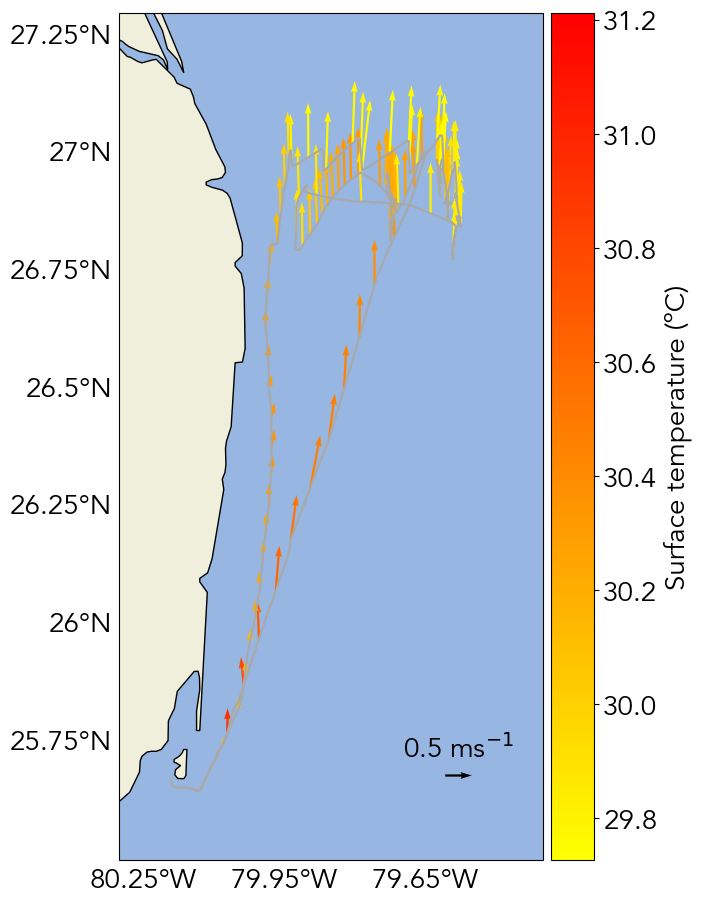

In [12]:
fig, ax = plt.subplots(figsize=(11,11), subplot_kw={"projection":ccrs.PlateCarree()})
ax.plot(ds.lon, ds.lat, c="darkgrey")
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)
gl = ax.gridlines(lw =0, 
                  draw_labels=True)
gl.top_labels = False
gl.right_labels = False
quivplt = ds.isel(time=np.arange(0,len(ds.time),8),
                  depth=slice(0,100)).mean('depth').plot.quiver(x='lon',
                                                                y='lat',
                                                                u='u',
                                                                v='v',
                                                                scale=8,
                                                                pivot='tail',
                                                                hue="tr_temp",
                                                                cmap="autumn_r",
                                                                cbar_kwargs={'pad':0.01,'label':'Surface temperature (ºC)'})

qk = ax.quiverkey(quivplt, 0.8, 0.1, 0.5, '0.5 ms$^{-1}$', 
                  labelpos='N',
                  coordinates='axes', zorder=6, color='k')
ax.set_extent([-80.3,-79.4,27.3,25.5])
#plt.title("Cruise Track with ADCP Data")